# Méthode de Brent

Donner l'expreesion de la fonction: x**2-4*x+3
Donner le début de l'intervalle: 0
Donner la fin de l'intervalle: 1.5
Donner l'erreur0.0001
Affichage de l'itération 1 :
1.2 -0.3599999999999999
Affichage de l'itération 2 :
0.9527472527472522 0.09673831662842769
Affichage de l'itération 3 :
1.005116002379536 -0.010205831278724542
Affichage de l'itération 4 :
1.0001183785405123 -0.0002367430675458415
Affichage de l'itération 5 :
0.9999999861290559 2.7741888342092125e-08
Affichage de l'itération 6 :
1.0000000000008211 -1.6422418980255316e-12
Affichage du résultat :
1.0000000000008211
Le nombre d'itérations final est: 6
Temps d'exécution est  0.04128289222717285


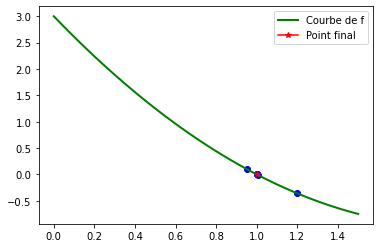

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import time

f=input("Donner l'expreesion de la fonction: ")
a=float(input("Donner le début de l'intervalle: "))
b=float(input("Donner la fin de l'intervalle: "))
e=float(input("Donner l'erreur"))

x = np.linspace(a, b, 100)

t1=time.time()
def fct(f,x):
    r = eval(f)
    return r #On définit la fonction qu'on souhaitera chercher la racine

if fct(f,a)*fct(f,b) < 0 :    

    if abs(fct(f,a))<abs(fct(f,b)) : #a est une meilleure aproximtion que b
        a,b=b,a

    c=a
    mflag=True
    i=0
    
    while fct(f,b)!=0 and abs(b-a)>e : #condition de convergence
        i+=1
        if fct(f,a)!=fct(f,c) and fct(f,b)!=fct(f,c) : #interpolation quadratique inverse
            s= (a*fct(f,b)*fct(f,c)) / ((fct(f,a)-fct(f,b))*(fct(f,a)-fct(f,c)))
            s+= (b*fct(f,a)*fct(f,c)) / ((fct(f,b)-fct(f,a))*(fct(f,b)-fct(f,c)))
            s+= (c*fct(f,a)*fct(f,b)) / ((fct(f,c)-fct(f,a))*(fct(f,c)-fct(f,b)))
                 
        else :
            s= b - fct(f,b)*(b-a)/(fct(f,b)-fct(f,a)) #méthode de la sécante
        
        if (s < min((3*a+b)/4,b) or s > max((3*a+b)/4,b)) or (mflag==True and abs(s-b)>=abs(b-c)/2) or (mflag==False and abs(s-b)>=abs(c-d)/2):
            #la condition pour accepter la valeur d'interpolation s 
            s=(a+b)/2 #méthode de la dichotomie
            mflag=True #on a utilisé la méthode de dichotomie
                 
        else:
            mflag=False #on n'a pas utilisé la méthode de dichotomie
                 
        print ("Affichage de l'itération",i,":")
        print (s,fct(f,s))
        plt.plot(s, fct(f,s), color='blue', marker='o')
        
        d=c
        c=b
                 
        if fct(f,a)*fct(f,s)<0 :
            b=s
        else:    
            a=s
                 
        if abs(fct(f,a))<abs(fct(f,b)): #a est une meilleure aproximtion que b
            a,b=b,a
            
    print ("Affichage du résultat :")
    print (b)
    print("Le nombre d'itérations final est:", i)
    
    plt.plot(x, fct(f,x), label='Courbe de f', linewidth=2, color='green')
    plt.plot(b,fct(f,b),color='red',marker='*', label='Point final')
    plt.legend()
    print("Temps d'exécution est " ,time.time()-t1)

#    Méthode de Fausse Position

Donner le début de l'intervalle: 0
Donner la fin de l'intervalle: 1.5
Donner l'erreur0.0001
Affichage de l'itération 1 :
1.2 -0.3599999999999999
Affichage de l'itération 2 :
0.9230769230769231 0.15976331360946716
Affichage de l'itération 3 :
1.024390243902439 -0.04818560380725767
Affichage de l'itération 4 :
0.9917355371900826 0.01659722696537136
Affichage de l'itération 5 :
1.0027397260273974 -0.0054719459560894634
Affichage de l'itération 6 :
0.9990850869167429 0.0018306632324640582
Affichage de l'itération 7 :
1.000304785126486 -0.0006094773589984115
Affichage de l'itération 8 :
0.9998983843105376 0.0002032417046731183
Affichage de l'itération 9 :
1.000033869602032 -6.773805691429047e-05
Affichage de l'itération 10 :
0.999988709877728 2.2580372010860827e-05
Affichage du résultat :
0.999988709877728
Le nombre d'itérations final est: 10
temps d exécution est  0.04125094413757324


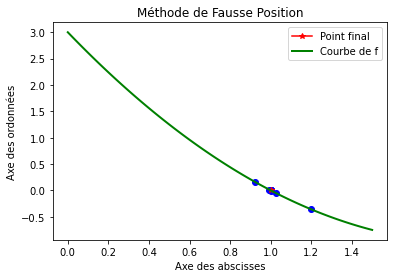

In [72]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import misc
import time 

def f(x):
    return x**2-4*x+3
def g(x): #Dérivée seconde de la fonction
    return misc.derivative(f, x, n=2)

def concave(a ,b): #Vérification de la concavité de f
    return (g(a) < 0)

a=float(input("Donner le début de l'intervalle: "))
b=float(input("Donner la fin de l'intervalle: "))
e=float(input("Donner l'erreur"))
t1=time.time()

xx = np.linspace(a, b, 100)

croissante=(f(a)<f(b)) #Vérification de la croissance de f

if (concave == True and croissante == True) or (concave == False and croissante == False):
    x = b
else:
    x = a

i=0    
while True:
    i+=1
    if (concave == True and croissante == True) or (concave == False and croissante == False):
        rslt = a - ( x - a ) * f(a) / ( f(x) - f(a) )
    else:
        rslt = b - (b - x) * f(b) / ( f(b) - f(x) )
    
    print ("Affichage de l'itération",i,":")
    print (rslt,f(rslt))
    plt.plot(rslt, f(rslt), color='blue', marker='o')        
    
    if abs (x - rslt) <= e:
        break
    else:
        x = rslt

print ("Affichage du résultat :")
print (rslt)
print("Le nombre d'itérations final est:", i)
print('temps d exécution est ' ,time.time()-t1)

plt.xlabel('Axe des abscisses') 
plt.ylabel('Axe des ordonnées') 
plt.title('Méthode de Fausse Position')
plt.plot(rslt,f(rslt),color='red',marker='*', label='Point final')
plt.plot(xx, f(xx), label='Courbe de f', linewidth=2, color='green')
plt.legend()